In [31]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
df=pd.read_csv("milk_quality_data.csv")

In [33]:
df.head()

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [34]:
df.describe()

,ph,temperature,taste,odor,fat,turbidity,colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [35]:
df.isna().sum()

ph             0
temperature    0
taste          0
odor           0
fat            0
turbidity      0
colour         0
grade          0
dtype: int64

In [36]:
df.shape

(1059, 8)

In [37]:
df["grade"]=df["grade"].map({'low' : 0, 'medium' : 1, 'high' : 2})

In [38]:
df.head()

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


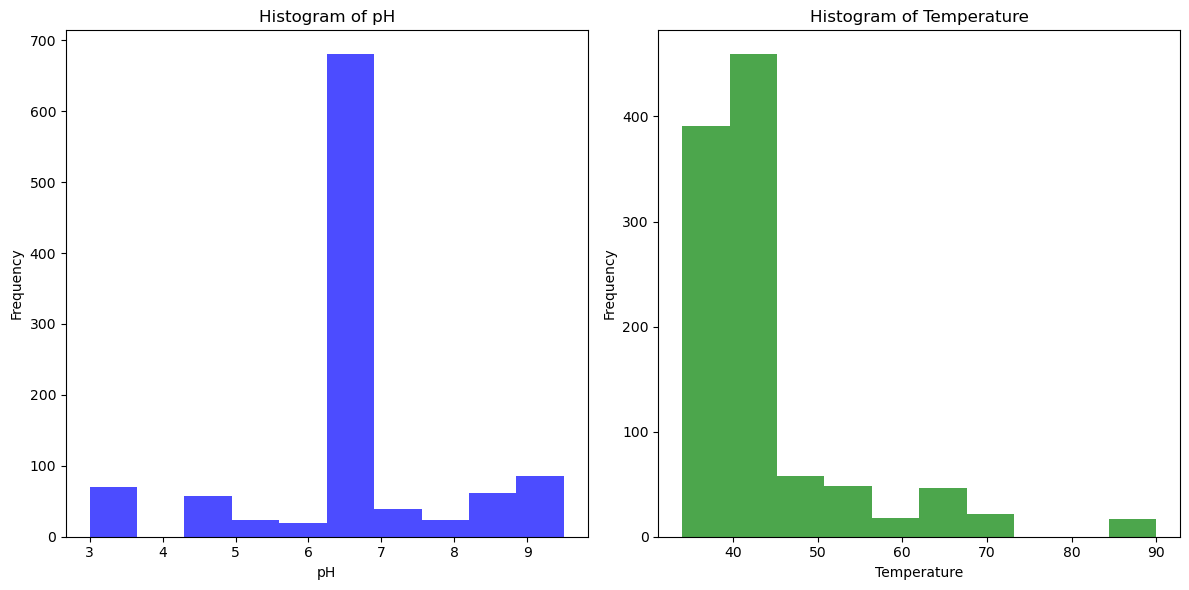

In [39]:
plt.figure(figsize=(12, 6))

# Histogram for pH
plt.subplot(1, 2, 1)
plt.hist(df['ph'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')

# Histogram for Temperature
plt.subplot(1, 2, 2)
plt.hist(df['temperature'], bins=10, color='green', alpha=0.7)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
X=df.drop("grade",axis=1)
y=df.grade

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Training Logistic Regression Model 

In [42]:
model_log_r=LogisticRegression()
model_log_r.fit(X_train,y_train)
y_pred_log_r=model_log_r.predict(X_test)
report_log_r=classification_report(y_test,y_pred_log_r)
score_log_r=model_log_r.score(X_test,y_test)
print(f"Logistic Regression Model Score :{score_log_r} \n\nClassification Report Of Logistic Regression Model : \n\n{report_log_r} ")

Logistic Regression Model Score :0.6981132075471698 

Classification Report Of Logistic Regression Model : 

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       115
           1       0.75      0.87      0.81       127
           2       0.56      0.37      0.44        76

    accuracy                           0.70       318
   macro avg       0.67      0.65      0.65       318
weighted avg       0.68      0.70      0.68       318
 


## Training Decision_Tree_Classifier Model 

In [43]:
model_decision_tree = DecisionTreeClassifier()

model_decision_tree.fit(X_train, y_train)

y_pred_decision_tree = model_decision_tree.predict(X_test)

report_decision_tree = classification_report(y_test, y_pred_decision_tree)

score_decision_tree = model_decision_tree.score(X_test, y_test)

print(f"Decision Tree Model Score: {score_decision_tree} \n\nClassification Report Of Decision Tree Model: \n\n{report_decision_tree}")

Decision Tree Model Score: 0.9937106918238994 

Classification Report Of Decision Tree Model: 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.99      1.00      1.00       127
           2       0.99      0.99      0.99        76

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



## Training Gradient_Boosting_Classifier Model 

In [44]:
model_gradient_boosting = GradientBoostingClassifier()

model_gradient_boosting.fit(X_train, y_train)

y_pred_gradient_boosting = model_gradient_boosting.predict(X_test)

report_gradient_boosting = classification_report(y_test, y_pred_gradient_boosting)

score_gradient_boosting = model_gradient_boosting.score(X_test, y_test)

print(f"Gradient Boosting Model Score: {score_gradient_boosting} \n\nClassification Report Of Gradient Boosting Model: \n\n{report_gradient_boosting}")

Gradient Boosting Model Score: 0.9937106918238994 

Classification Report Of Gradient Boosting Model: 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.99      1.00      1.00       127
           2       0.99      0.99      0.99        76

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



## Training Xtreme_Gradient_Boosting_Classifier Model 

In [45]:
model_xgb = XGBClassifier(n_estimators=50)

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

report_xgb = classification_report(y_test, y_pred_xgb)

score_xgb = model_xgb.score(X_test, y_test)

print(f"XGBoost Model Score: {score_xgb} \n\nClassification Report Of XGBoost Model: \n\n{report_xgb}")

XGBoost Model Score: 0.9968553459119497 

Classification Report Of XGBoost Model: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       0.99      1.00      1.00       127
           2       1.00      0.99      0.99        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



## Training Custom_Xtreme_Gradient_Boosting_Classifier Model 

In [46]:
model_xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.5
)

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

report_xgb = classification_report(y_test, y_pred_xgb)

score_xgb = model_xgb.score(X_test, y_test)

print(f"XGBoost Model Score: {score_xgb} \n\nClassification Report Of XGBoost Model: \n\n{report_xgb}")

XGBoost Model Score: 0.9968553459119497 

Classification Report Of XGBoost Model: 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.99      1.00      1.00       127
           2       1.00      1.00      1.00        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

